In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def calculate_overall_rmse(df):
    """
    Calculate the overall RMSE across x, y, z, and yaw compared to their reference values.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the actual values and reference values.
    
    Returns:
    float: The overall RMSE across all dimensions.
    """
    
    # Extract actual and reference values as numpy arrays
    actual_values = df[['x', 'y', 'z', 'yaw']].to_numpy()
    reference_values = df[['x_ref', 'y_ref', 'z_ref', 'yaw_ref']].to_numpy()
    actual_values = actual_values[83:]
    reference_values = reference_values[3:-80]
    
    # Compute the squared differences
    squared_errors = (actual_values - reference_values) ** 2
    
    # Compute the mean of the sum of squared differences across all dimensions
    mse = np.mean(np.sum(squared_errors, axis=1))
    
    # Return the square root of the mean squared error (overall RMSE)
    overall_rmse = np.sqrt(mse)
    
    return overall_rmse

In [25]:
log_file_path = 'log_jax.log'
# log_file_path = 'log_0order.log' # 'log1.log'
# log_file_path = 'log_1order.log'

# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,pred_time,nr_time,metadata
0,9.536743e-07,0.016461,-0.023182,1.023703,-0.016908,-0.762301,0.145294,-0.287209,0.006340,0.555705,0.226257,-0.8,0.0,0.247249,0.248492,Sim
1,2.496140e-01,0.016461,-0.023182,1.023703,-0.016908,-0.806451,0.284556,-0.441047,0.010779,0.524435,0.291492,-0.8,0.0,0.000680,0.000965,Jax
2,2.597952e-01,0.015202,-0.020251,1.040214,-0.017295,-0.841361,0.377851,-0.548733,0.014031,0.522994,0.294069,-0.8,0.0,0.000535,0.000821,1stOrderHold
3,2.707763e-01,0.015084,-0.020072,1.043294,-0.017317,-0.869584,0.436529,-0.616685,0.016315,0.521426,0.296841,-0.8,0.0,0.000715,0.001107,QuatYawError
4,2.797389e-01,0.015024,-0.019981,1.044912,-0.017308,-0.891584,0.469177,-0.644064,0.017911,0.520136,0.299097,-0.8,0.0,0.000567,0.000847,NoPyJoules


In [26]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"(Valid for Nonlin predictor only) Predictor was: {df_log['metadata'][2]}")
print(f"For yaw error we used: {df_log['metadata'][3]}")
print(f"RMSE: {calculate_overall_rmse(df_log)}")


This data comes from: Sim
Predictor was: Jax
(Valid for Nonlin predictor only) Predictor was: 1stOrderHold
For yaw error we used: QuatYawError
RMSE: 0.4272373068328901


In [27]:
def plot_adjusted_avg_and_max_xyz_vs_reference(df):
    fig, axs = plt.subplots(4, 4, figsize=(20, 12), sharex=False)
    time_max = df['time'].max()
    time_min = df['time'].min()
    x_lim = (time_min-1, time_max+1)
    
    # Maximum values
    max_throttle = 1.0
    min_throttle = 0.0
    rates_max_abs = 0.8
    max_rate = rates_max_abs
    min_rate = -rates_max_abs


    # Row 1: Plot x, y, z, psi vs references
    # plot x vs x_ref
    axs[0, 0].plot(df['time'][:][:-80], df['x'][:][80:], label='x', color='red')
    axs[0, 0].plot(df['time'][:][:-80], df['x_ref'][:][:-80], label='x_ref', color='blue', linestyle='--')
    axs[0, 0].set_ylabel('x / x_ref')
    axs[0, 0].set_xlabel('time')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(x_lim)

    # plot y vs y_ref
    axs[0, 1].plot(df['time'][:][:-80], df['y'][:][80:], label='y', color='red')
    axs[0, 1].plot(df['time'][:][:-80], df['y_ref'][:][:-80], label='y_ref', color='blue', linestyle='--')
    axs[0, 1].set_ylabel('y / y_ref')
    axs[0, 1].set_xlabel('time')
    axs[0, 1].legend()
    axs[0, 1].set_xlim(x_lim)

    # plot z vs z_ref
    axs[0, 2].plot(df['time'][:][:-80], -1*df['z'][:][80:], label='z', color='red')
    axs[0, 2].plot(df['time'][:][:-80], -1*df['z_ref'][:][:-80], label='z_ref', color='blue', linestyle='--')
    axs[0, 2].set_ylabel('z / z_ref')
    axs[0, 2].set_xlabel('time')
    axs[0, 2].legend()
    axs[0, 2].set_xlim(x_lim)
    axs[0, 2].set_ylim(0,-1*df['z'].min()+.1)


    # plot psi vs psi_ref
    axs[0, 3].plot(df['time'][:][:-80], df['yaw'][:][80:], label='psi', color='red')
    axs[0, 3].plot(df['time'][:][:-80], df['yaw_ref'][:][:-80], label='psi_ref', color='blue', linestyle='--')
    axs[0, 3].set_ylabel('psi / psi_ref')
    axs[0, 3].set_xlabel('time')
    axs[0, 3].legend()
    axs[0, 3].set_xlim(x_lim)

    # Row 2: Plot cross comparisons (x vs y, x vs z, y vs z, time vs solve_time)
    # plot x vs y and x_ref vs y_ref
    axs[1, 0].plot(df['x'][3:][80:], df['y'][3:][80:], label='x vs y', color='red')
    axs[1, 0].plot(df['x_ref'][3:][:-80], df['y_ref'][3:][:-80], label='x_ref vs y_ref', color='blue', linestyle='--')
    axs[1, 0].set_ylabel('y')
    axs[1, 0].set_xlabel('x')
    axs[1, 0].legend()

    # plot x vs z and x_ref vs z_ref
    axs[1, 1].plot(df['x'][3:][80:], -1*df['z'][3:][80:], label='x vs z', color='red')
    axs[1, 1].plot(df['x_ref'][3:][:-80], -1*df['z_ref'][3:][:-80], label='x_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 1].set_ylabel('z')
    axs[1, 1].set_xlabel('x')
    axs[1, 1].set_ylim(0,-1*df['z'].min()+.1)
    axs[1, 1].legend()

    # plot y vs z and y_ref vs z_ref
    axs[1, 2].plot(df['y'][3:][80:], -1*df['z'][3:][80:], label='y vs z', color='red')
    axs[1, 2].plot(df['y_ref'][3:][:-80], -1*df['z_ref'][3:][:-80], label='y_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 2].set_ylabel('z')
    axs[1, 2].set_xlabel('y')
    axs[1, 2].set_ylim(0,-1*df['z'].min()+.1)
    axs[1, 2].legend()

    # plot time vs solve_time
    axs[1, 3].plot(df['time'], df['nr_time']* 1e-9, label='solve_time', color='purple')
    axs[1, 3].set_ylabel('solve_time')
    axs[1, 3].set_xlabel('time')
    axs[1, 3].legend()
    axs[1, 3].set_xlim(x_lim)

    # Row 3: Plot fx, fy, fz, tauz vs time
    # plot throttle vs time
    axs[2, 0].plot(df['time'], -1*df['throttle'], label='throttle', color='blue')
    axs[2, 0].axhline(y=max_throttle, color='red', linestyle='--', label=f'+{max_throttle}')
    axs[2, 0].axhline(y=min_throttle, color='red', linestyle='--', label=f'-{max_throttle}')
    axs[2, 0].set_ylabel('throttle')
    axs[2, 0].set_xlabel('time')
    axs[2, 0].legend()
    axs[2, 0].set_ylim((-0.2, 1.2))
    axs[2, 0].set_xlim(x_lim)

    # plot roll_rate vs time
    axs[2, 1].plot(df['time'], df['roll_rate'], label='roll_rate', color='orange')
    axs[2, 1].axhline(y=max_rate, color='red', linestyle='--', label=f'+{max_rate}')
    axs[2, 1].axhline(y=min_rate, color='red', linestyle='--', label=f'-{min_rate}')
    axs[2, 1].set_ylabel('roll_rate')
    axs[2, 1].set_xlabel('time')
    axs[2, 1].legend()
    axs[2, 1].set_ylim((-1.0, 1.0))
    axs[2, 1].set_xlim(x_lim)

    # plot pitch_rate vs time
    axs[2, 2].plot(df['time'], df['pitch_rate'], label='pitch_rate', color='green')
    axs[2, 2].axhline(y=max_rate, color='red', linestyle='--', label=f'+{max_rate}')
    axs[2, 2].axhline(y=min_rate, color='red', linestyle='--', label=f'-{min_rate}')
    axs[2, 2].set_ylabel('pitch_rate')
    axs[2, 2].set_xlabel('time')
    axs[2, 2].legend()
    axs[2, 2].set_ylim((-1.0, 1.0))
    axs[2, 2].set_xlim(x_lim)

    # plot yaw_rate vs time
    axs[2, 3].plot(df['time'], df['yaw_rate'], label='yaw_rate', color='purple')
    axs[2, 3].axhline(y=max_rate, color='red', linestyle='--', label=f'+{max_rate}')
    axs[2, 3].axhline(y=min_rate, color='red', linestyle='--', label=f'-{min_rate}')
    axs[2, 3].set_ylabel('yaw_rate')
    axs[2, 3].set_xlabel('time')
    axs[2, 3].legend()
    axs[2, 3].set_ylim((-1.0, 1.0))
    axs[2, 3].set_xlim(x_lim)

    # Row 4: plot pred_time * nr_time vs time
    # plot pred_time vs time
    axs[3, 0].plot(df['time'][1:], df['pred_time'][1:], label='pred_time', color='blue')
    axs[3, 0].set_ylabel('pred_time')
    axs[3, 0].set_xlabel('time')
    axs[3, 0].legend()
    axs[3, 0].set_xlim(x_lim)

    # plot nr_time vs time
    axs[3, 1].plot(df['time'][1:], df['nr_time'][1:], label='nr_time', color='orange')
    axs[3, 1].set_ylabel('nr_time')
    axs[3, 1].set_xlabel('time')
    axs[3, 1].legend()
    axs[3, 1].set_xlim(x_lim)

    # # plot v_fz vs time
    # axs[3, 2].plot(df['time'], df['v_fz'], label='cbf_fz', color='green')
    # axs[3, 2].set_ylabel('v_fz')
    # axs[3, 2].set_xlabel('time')
    # axs[3, 2].legend()
    # axs[3, 2].set_xlim(x_lim)

    # # plot v_tz vs time
    # axs[3, 3].plot(df['time'], df['v_tz'], label='cbf_tauz', color='purple')
    # axs[3, 3].set_ylabel('v_tauz')
    # axs[3, 3].set_xlabel('time')
    # axs[3, 3].legend()
    # axs[3, 3].set_xlim(x_lim)
    

/tmp/ipykernel_84603/3756390631.py:52: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[1, 0].plot(df['x'][3:][80:], df['y'][3:][80:], label='x vs y', color='red')
/tmp/ipykernel_84603/3756390631.py:53: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  axs[1, 0].plot(df['x_ref'][3:][:-80], df['y_ref'][3:][:-80], label='x_ref vs y_ref', color='blue', linestyle='--')
/tmp/ipykernel_84603/3756390631.py:59: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is depr

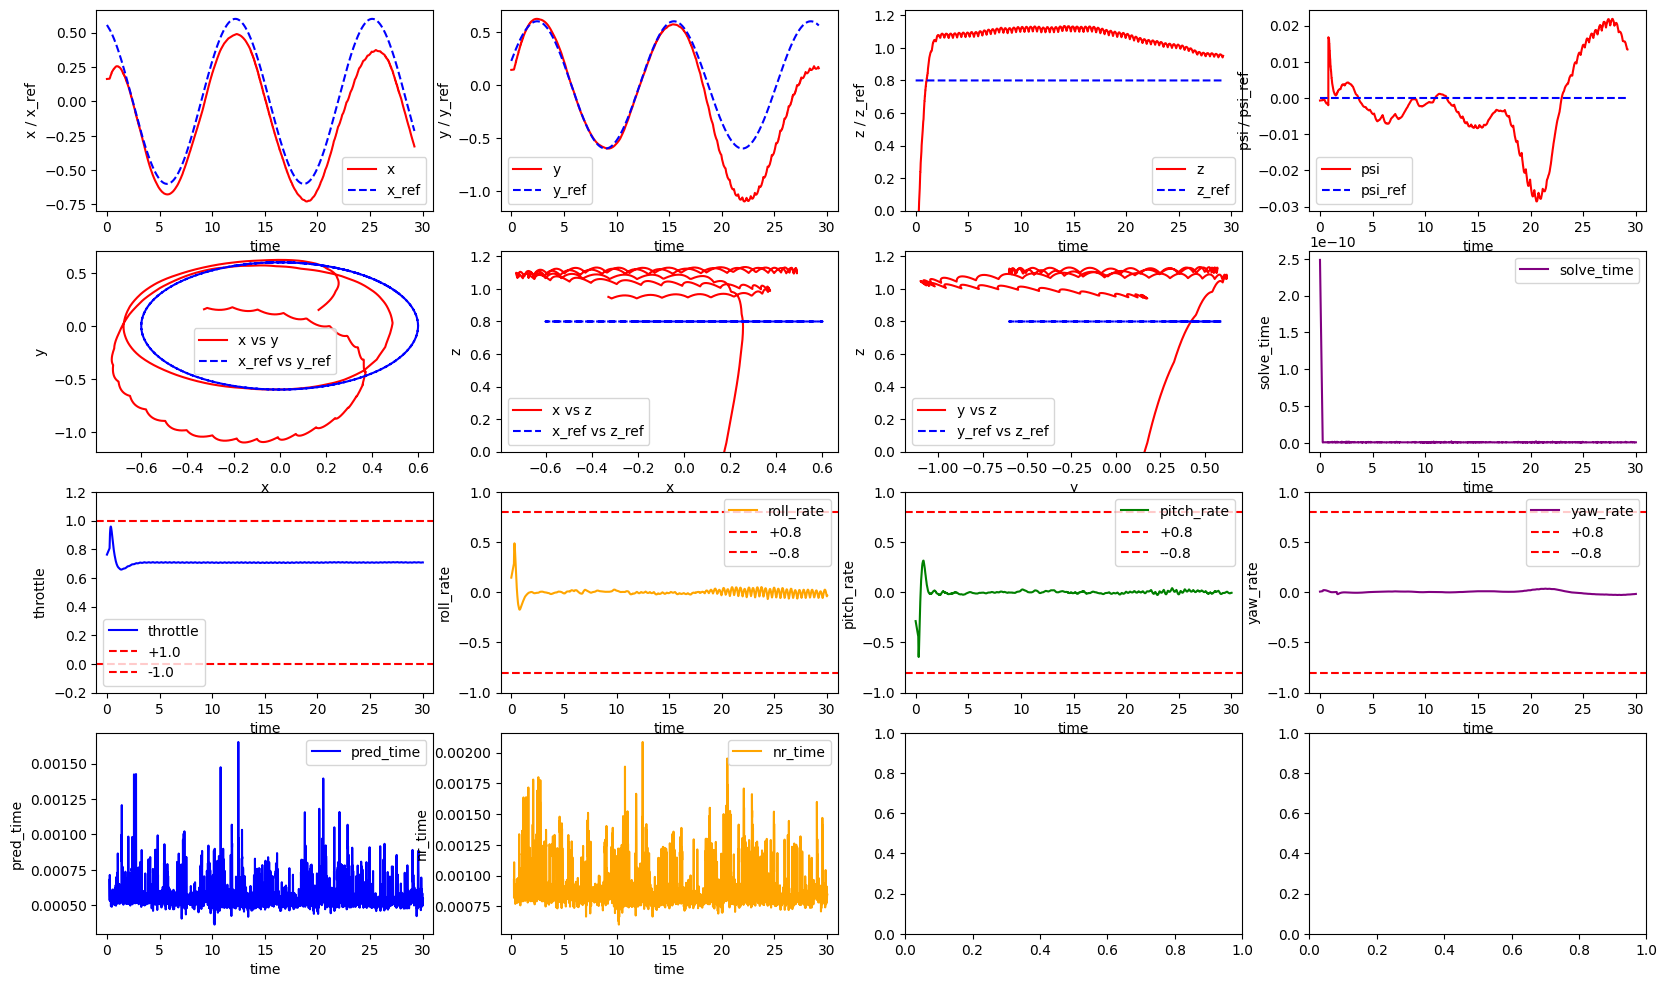

In [28]:
# Reuse the plotting function defined earlier for the uploaded .log data
plot_adjusted_avg_and_max_xyz_vs_reference(df_log)

In [23]:
df_log['z'][0:50]

0     0.872106
1     0.871491
2     0.870928
3     0.870413
4     0.869531
5     0.869227
6     0.868966
7     0.868745
8     0.868564
9     0.868323
10    0.868258
11    0.868229
12    0.868348
13    0.868495
14    0.868673
15    0.868882
16    0.869393
17    0.869695
18    0.870025
19    0.870381
20    0.871277
21    0.871761
22    0.872270
23    0.872801
24    0.873355
25    0.874529
26    0.875147
27    0.873196
28    0.869550
29    0.867850
30    0.866227
31    0.864683
32    0.863213
33    0.860492
34    0.859298
35    0.858169
36    0.856098
37    0.855152
38    0.854264
39    0.853431
40    0.851920
41    0.851320
42    0.850771
43    0.850268
44    0.849395
45    0.849025
46    0.848700
47    0.848419
48    0.848050
49    0.847959
Name: z, dtype: float64

In [24]:
df_log['yaw'][-10:]

2989   -0.000480
2990   -0.000459
2991   -0.000459
2992   -0.000456
2993   -0.000450
2994   -0.000433
2995   -0.000404
2996   -0.000396
2997   -0.000397
2998   -0.000403
Name: yaw, dtype: float64